<a href="https://colab.research.google.com/github/jwindischbauer/CoderHouse/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Proyecto final***

*Encuesta satisfaccion de clientes de una aerolinea*

---



In [ ]:
# Importacion de las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Lectura del archivo
df = pd.read_csv("/content/Encuesta satisfaccion aerolinea.csv", sep=';')

# Visualizacion de las 3 primeras filas del archivo
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


***Data Wrangling***

*Analisis de la base de datos*

---

In [ ]:
# Tamaño del archivo
print('El archivo tiene ' + str(df.shape[0]) + ' filas y ' + str(df.shape[1]) + ' columnas')

El archivo tiene 25976 filas y 25 columnas


In [ ]:
# Identificacion de tipos de variables y el recuento de no nulos 
df.info()

In [ ]:
# Visualizacion de las columnas
df.columns

In [ ]:
# Eliminacion de los campos indispensables y renombre de la columna Leg room service
df2 = df.drop(['Unnamed: 0','Departure Delay in Minutes','Arrival Delay in Minutes','Departure/Arrival time convenient'], axis=1)
df2.rename(columns={'Leg room service':'Seat space'}, inplace=True)
df2.head(3)

In [ ]:
# Visualizacion de las columnas del nuevo data frame
print(df2.columns)
print('')
print('El archivo tiene ' + str(df2.shape[0]) + ' filas y ' + str(df2.shape[1]) + ' columnas')

In [ ]:
# Agrupacion de campos por tipo de dato
col_numerica = ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking',
'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Seat space', 
'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

col_categorica = ['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']

variables= ['Inflight wifi service', 'Ease of Online booking', 'Gate location','Food and drink', 'Online boarding','Seat comfort','Inflight entertainment',  
'On-board service', 'Seat space', 'Baggage handling','Checkin service', 'Inflight service', 'Cleanliness'] # Se asignan todos los campos requeridos a una unica variable

In [ ]:
# Descripcion de las variables numericas
df2[col_numerica].describe().T

In [ ]:
# Visualizacion del recuento de respuestas
for x in variables:
   frecuencia_valores = df2[x].value_counts()
   print(frecuencia_valores)

2    6490
3    6317
4    4981
1    4488
5    2887
0     813
Name: Inflight wifi service, dtype: int64
2    6030
3    5944
4    4873
1    4361
5    3573
0    1195
Name: Ease of Online booking, dtype: int64
3    7140
4    6040
2    4837
1    4429
5    3530
Name: Gate location, dtype: int64
4    6204
5    5644
3    5494
2    5395
1    3214
0      25
Name: Food and drink, dtype: int64
4    7706
3    5313
5    5307
2    4429
1    2569
0     652
Name: Online boarding, dtype: int64
4    7991
5    6688
3    4632
2    3632
1    3033
Name: Seat comfort, dtype: int64
4    7368
5    6331
3    4745
2    4331
1    3197
0       4
Name: Inflight entertainment, dtype: int64
4    7836
5    5844
3    5709
2    3670
1    2915
0       2
Name: On-board service, dtype: int64
4    7097
5    6238
2    5015
3    4958
1    2542
0     126
Name: Seat space, dtype: int64
4    9378
5    6747
3    5219
2    2841
1    1791
Name: Baggage handling, dtype: int64
4    7278
3    7007
5    5264
1    3218
2    3209
Name: Che

In [ ]:
# Descripcion de las variables categoricas
df2[col_categorica].describe().T

,count,unique,top,freq
Gender,25976,2,Female,13172
Customer Type,25976,2,Loyal Customer,21177
Type of Travel,25976,2,Business travel,18038
Class,25976,3,Business,12495
satisfaction,25976,2,neutral or dissatisfied,14573


In [ ]:
# Revision de valores misssings o nulos 
df2.isnull().sum()

id                        0
Gender                    0
Customer Type             0
Age                       0
Type of Travel            0
Class                     0
Flight Distance           0
Inflight wifi service     0
Ease of Online booking    0
Gate location             0
Food and drink            0
Online boarding           0
Seat comfort              0
Inflight entertainment    0
On-board service          0
Seat space                0
Baggage handling          0
Checkin service           0
Inflight service          0
Cleanliness               0
satisfaction              0
dtype: int64

**Analisis univariado**

---



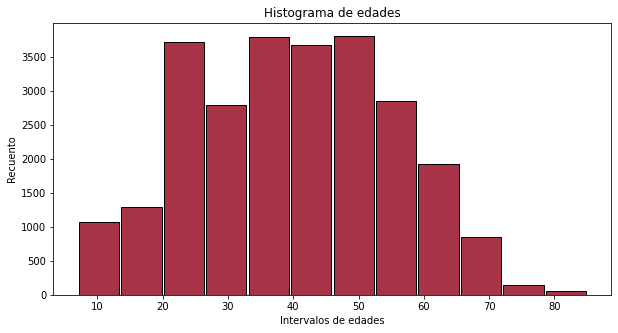

In [ ]:
# Distribucion de edades
datos = df2['Age'] #asignacion de la columna edad a una variable
datos_norm = datos.values.flatten() #normalizacion de los datos
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(datos_norm, bins=12, rwidth=0.95, edgecolor='black', color='#A63446') # se grafican los valores 
ax.set_title('Histograma de edades') #se pone titulo al grafico
ax.set_xlabel('Intervalos de edades') #se pone nombre al eje x
ax.set_ylabel('Recuento') #se pone nombre al eje x
plt.savefig('Customed Plot.pdf', dpi=300, bbox_inches='tight') #Guardamos el grafico

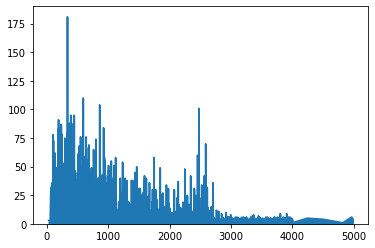

In [ ]:
# Distancia de vuelos
df2['Flight Distance'].value_counts().sort_index().plot.area() # Se cuentan los vuelos que tienen misma distancia y se grafica

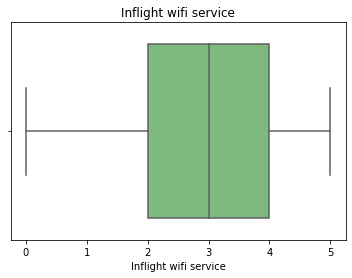

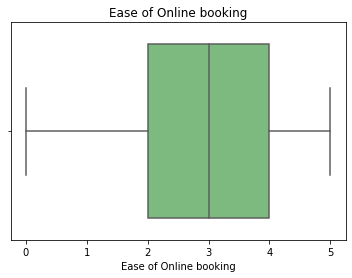

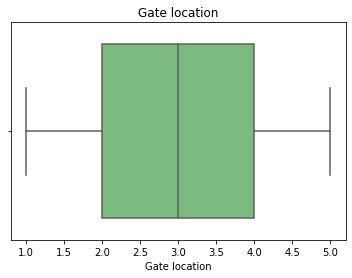

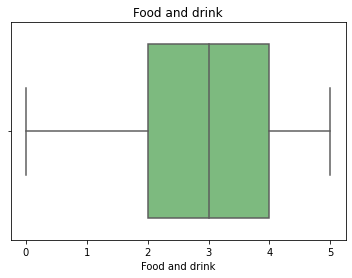

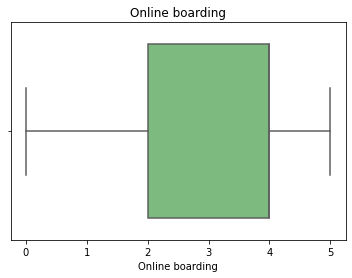

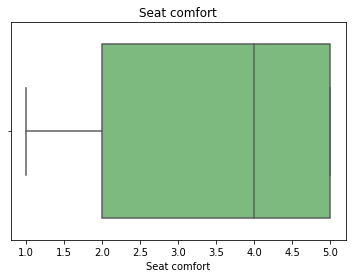

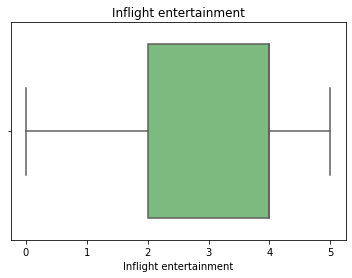

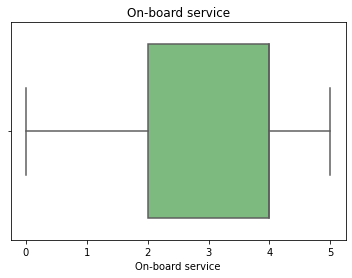

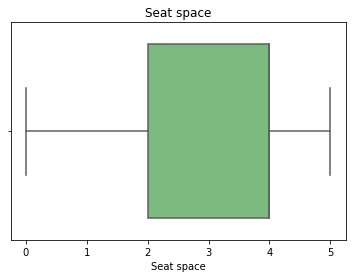

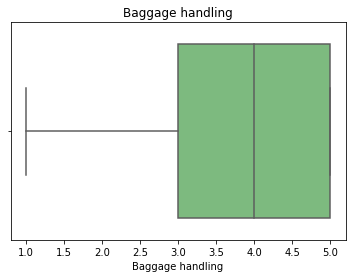

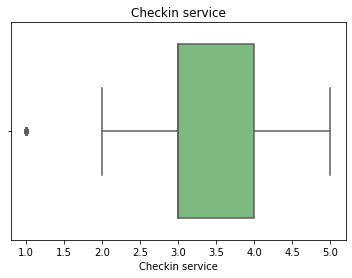

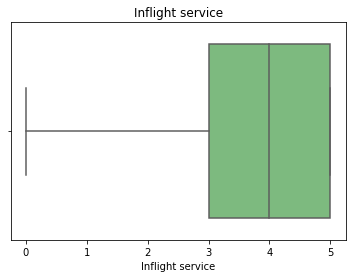

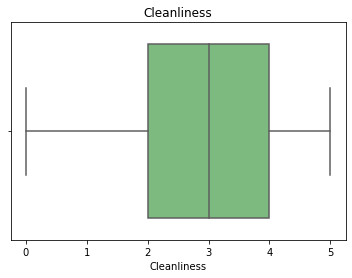

In [ ]:
# Analisis de todos los parametros de la encuesta
for x in variables: # Funcion for para iterar sobre todos los campos
  plt.title(df2[x].name) # Asignacion de titulo al grafico
  sns.boxplot(x=df2[x], palette="Greens"); # Asignacion de color y variable al grafico box plot
  plt.show() # Para mostrar todos los graficos

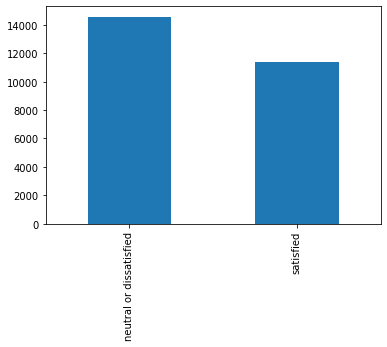

In [ ]:
# Visualizacion de la satisfaccion
df2['satisfaction'].value_counts().sort_index().plot(kind ='bar')

**Analisis bivariado**

---



In [ ]:
# Se visualiza la relacion entre la edad y otras variables categoricas
variables = ['Gender', 'Customer Type', 'Type of Travel','Class', 'satisfaction'] # Se asignan todos los campos requeridos a una unica variable
for x in variables: # Se arma un for para analizar todas los campos de la nueva variable creada
   plt.figure(figsize=(5,5)) # Se fija el tamaño de grafico
   sns.boxplot(df2[x], df['Age']) # Se grafica un campo de la nueva variable contra el campo Edad
   plt.title('Relación entre Age y ' + str(df[x].name), fontsize = 15) # Se agrega el titulo al grafico
   plt.show()

In [ ]:
# Relacion entre edad y longitud del vuelo
df2.plot.scatter(x='Age', y='Flight Distance')

**Analisis multivariado**

---



In [ ]:
# Visualizacion de la matriz de correlacion, en donde se busca encontrar alguna correlacion entre las variables de la encuesta
variables_vuelo= ['Inflight wifi service','Food and drink','Seat comfort','Inflight entertainment', 'Seat space', 'Inflight service', 'Cleanliness'] # Se asignan todos los campos requeridos a una unica variable

plt.figure(dpi = 120,figsize= (5,3)) # Se asigna el tamaño de la figura
mask = np.triu(np.ones_like(df2[variables_vuelo].corr(),dtype = bool)) # Se seleccionan solo los datos debajo de la diagonal del mapa con la funcion triu 
sns.heatmap(df2[variables_vuelo].corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma') # Se grafica el mapa de calor
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Mapa de correlación') # Se agrega titulo al mapa
plt.show() # Se visualiza el mapa

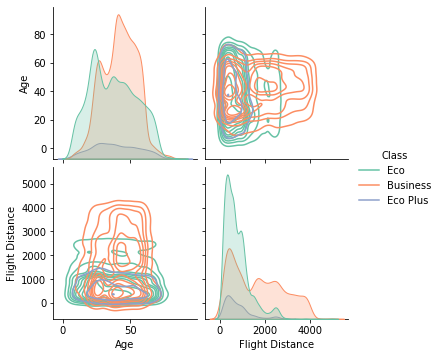

In [ ]:
# Visualizacion de la relacion entre Flight Distance y Age a traves del target clase
df2_2=df2.loc[:, ['Age','Class', 'Flight Distance']] # Se seleccionan los campos requeridos del data frame
sns.pairplot(df2_2,hue = 'Class', palette = 'Set2', kind="kde") # Se grafica en pairplot con el target clase para trazar relaciones por pares entre las variables edad y distancia de vuelo

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


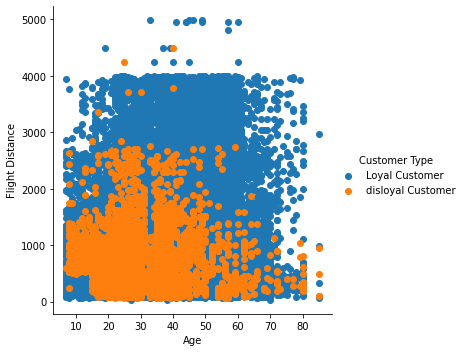

In [ ]:
# Visualizacion de la relacion entre Flight Distance y Age a traves del target tipo de cliente
sns.FacetGrid(df2,hue = 'Customer Type' , size = 5).map(plt.scatter,'Age','Flight Distance').add_legend(); 
plt.show() # Se visualiza el mapa